Populating the interactive namespace from numpy and matplotlib


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


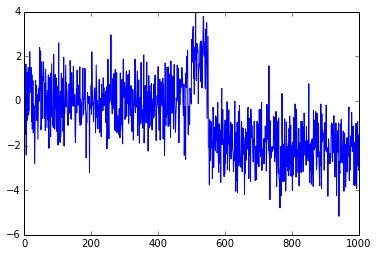

In [2]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data (1-variate gaussian, 2 change points that are close)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,550):
    data[i] = data[i] + 2
for i in range(550,1000):
    data[i] = data[i] - 2
t_true  = [500, 550]

plt.plot(data)

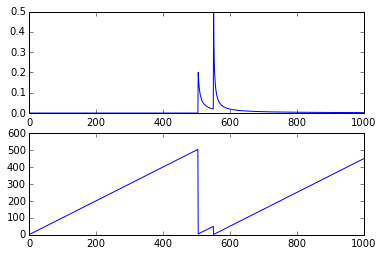

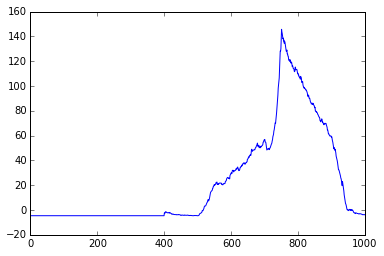

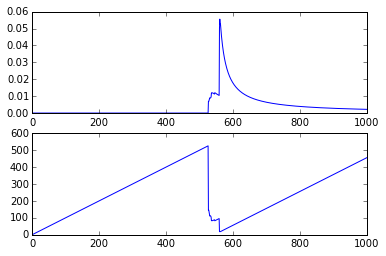

0.932026143791
0.599202178649
0.71074422658


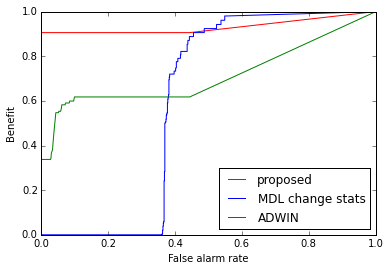

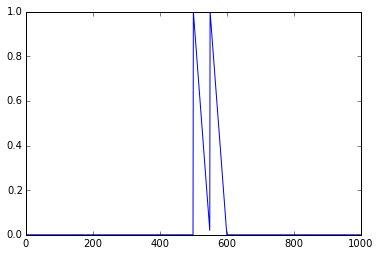

In [3]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 50
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

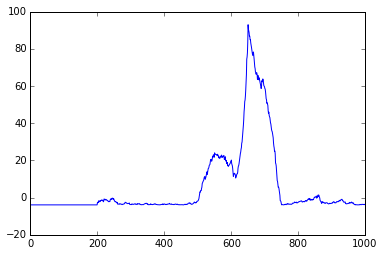

0.932026143791
0.860291503268
0.71074422658


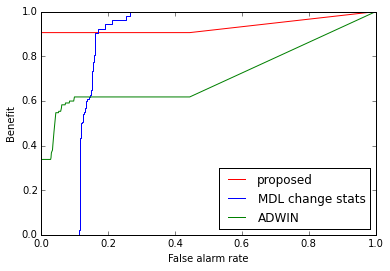

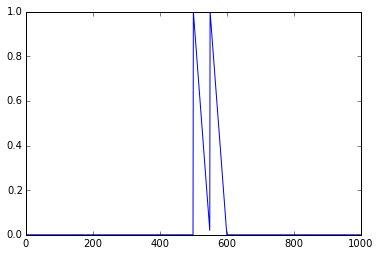

In [5]:
plt.figure(3)
h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 50
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

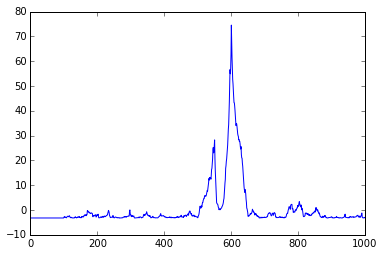

0.932026143791
0.913283660131
0.71074422658


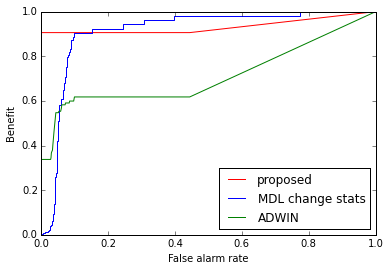

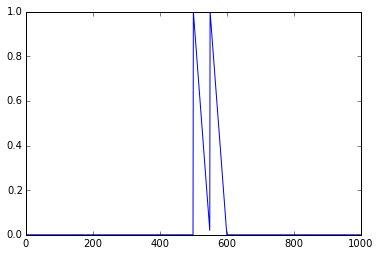

In [7]:
plt.figure(3)
h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 50
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


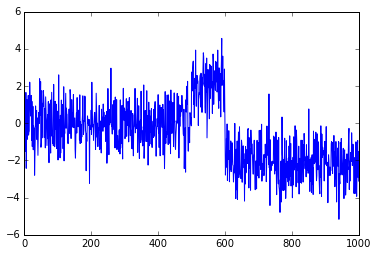

In [8]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data (1-variate gaussian, 2 change points that are close)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,600):
    data[i] = data[i] + 2
for i in range(600,1000):
    data[i] = data[i] - 2
t_true  = [500, 600]

plt.plot(data)

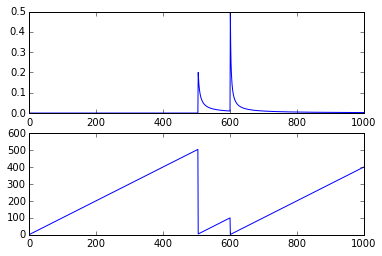

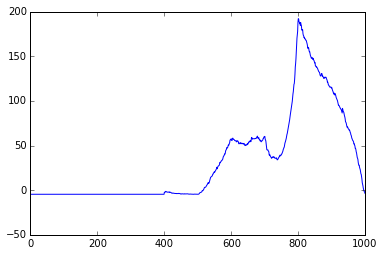

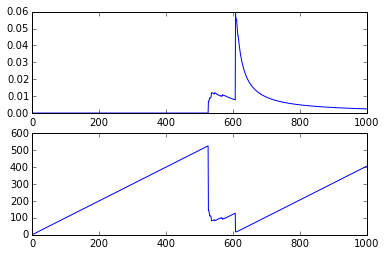

0.966646039604
0.682833910891
0.84227134901


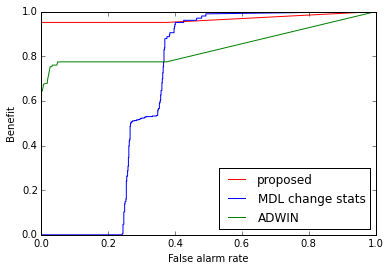

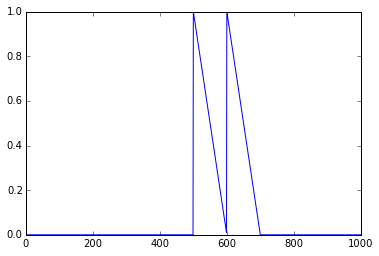

In [9]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

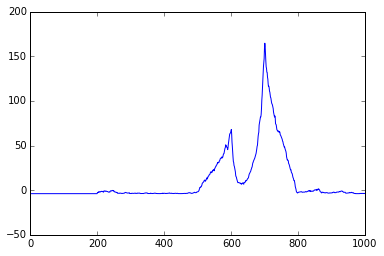

0.966646039604
0.8969875
0.84227134901


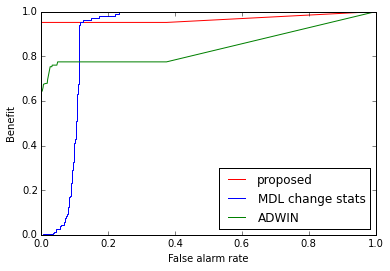

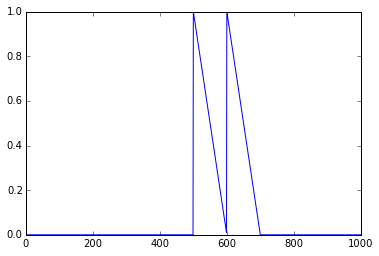

In [10]:
plt.figure(3)
h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

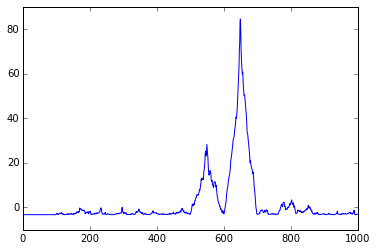

0.966646039604
0.967752846535
0.84227134901


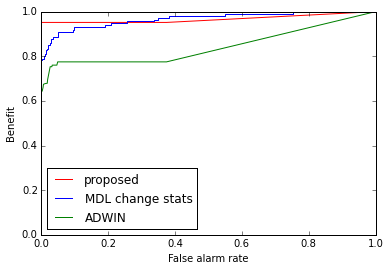

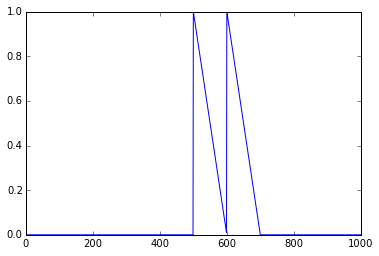

In [11]:
plt.figure(3)
h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


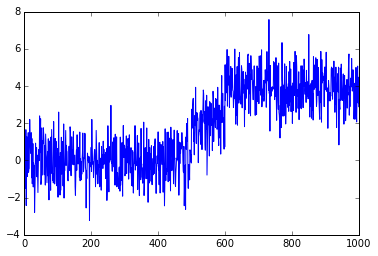

In [14]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data (1-variate gaussian, 2 change points that are close)
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,600):
    data[i] = data[i] + 2
for i in range(600,1000):
    data[i] = data[i] + 4
t_true  = [500, 600]

plt.plot(data)

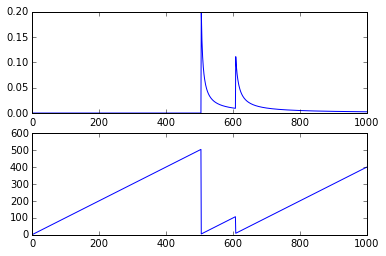

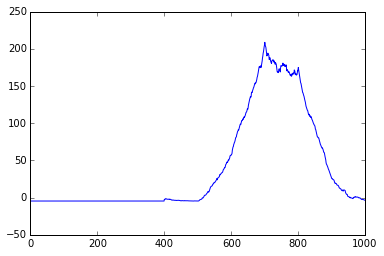

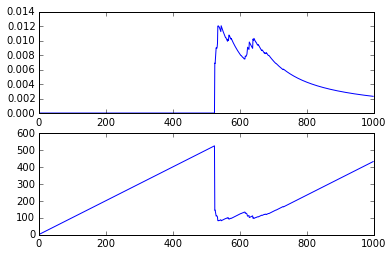

0.966358415842
0.751478960396
0.844992326733


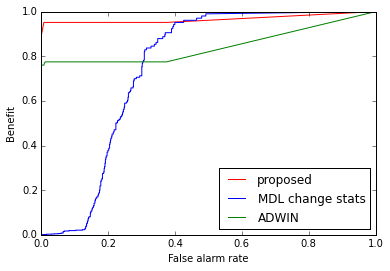

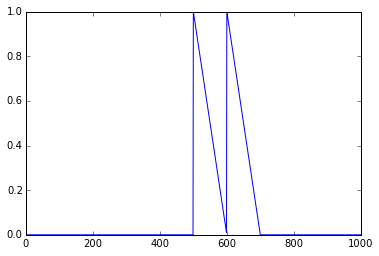

In [15]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

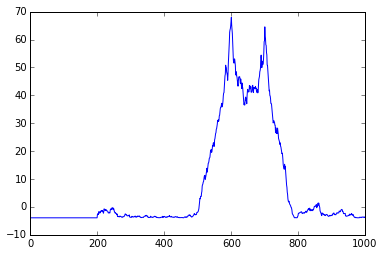

0.966358415842
0.95664740099
0.844992326733


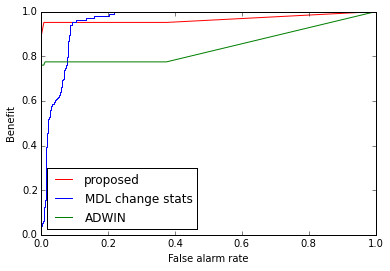

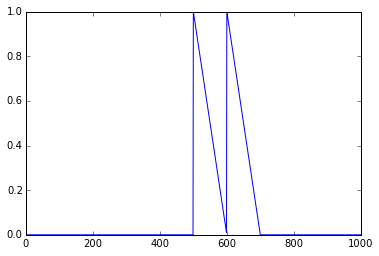

In [16]:
plt.figure(3)
h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

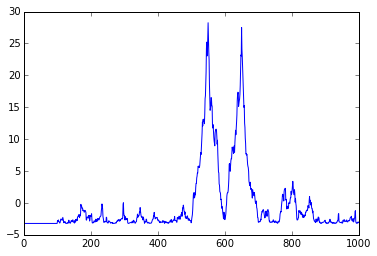

0.966358415842
0.967943811881
0.844992326733


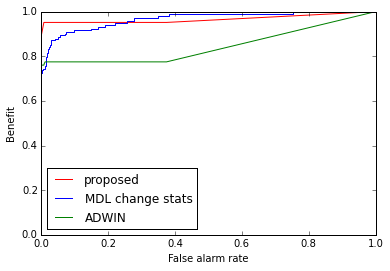

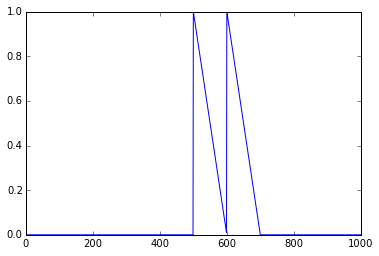

In [17]:
plt.figure(3)
h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[2 * h :1000]))
score2_[2 * h :1000] = score2[2 * h :1000]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

単変化(平均), $\Delta = 1$

Populating the interactive namespace from numpy and matplotlib


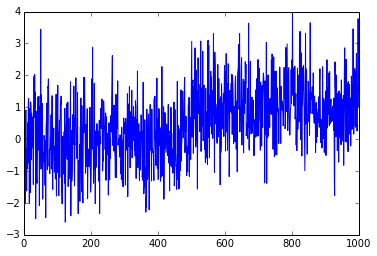

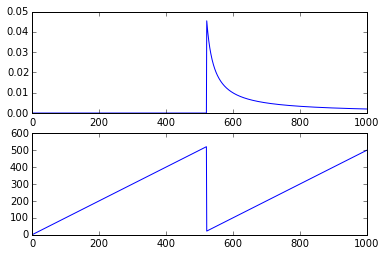

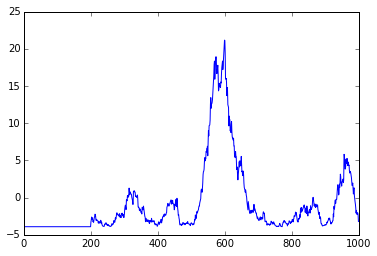

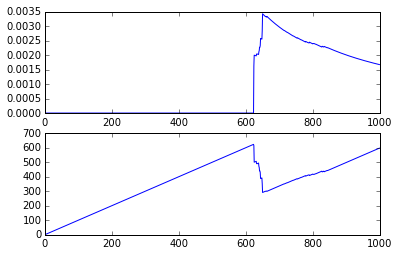

0.863526119403
0.884798880597
0.395454508706


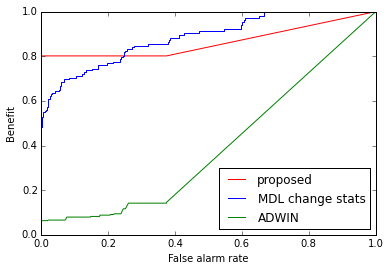

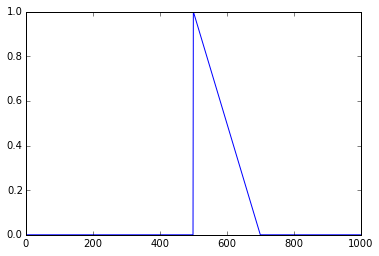

In [29]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


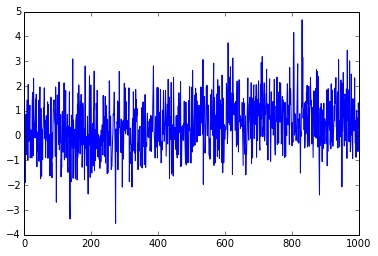

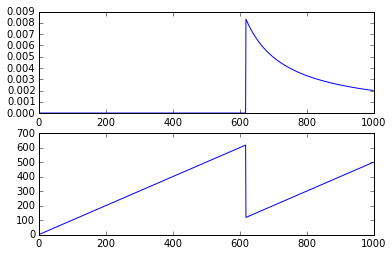

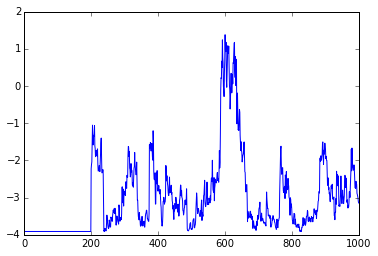

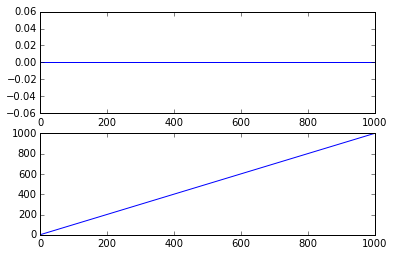

0.42609141791
0.718423134328
0.5


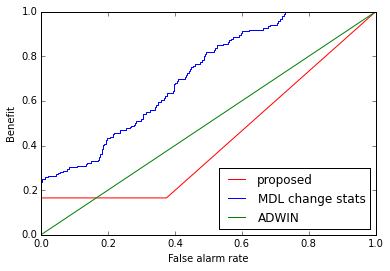

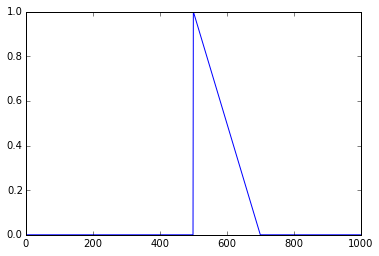

In [32]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 0.8
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [37]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import evaluation as ev
from sklearn.metrics import auc
import adwin

aucs_mono_mu1 = np.zeros((3, 30))
for k in range(0, 30):
    # generate data
    rng = np.random
    data = rng.normal(size=1000)
    for i in range(500,1000):
        data[i] = data[i] + 2
    t_true = [500]
    T = 200
    
    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 1.5)
    score = ev.InvRunLen(size[0])
    
    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1000) * (min(score2[200:1000]))
    score2_[200:1000] = score2[200:1000]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_mono_mu1[0, k] = auc(x,y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mono_mu1[1, k] = auc(x2,y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e = ev.B(score3, beta, t_true, T)
        f  = ev.N(score3, beta, t_true, T)
        g = ev.supB(score3, t_true, T)
        h = ev.supN(score3, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_mono_mu1[2, k] = auc(x3,y3)

Populating the interactive namespace from numpy and matplotlib


In [38]:
print("[proposed,   MDL_h=200,   ADWIN]")# mu=2, e=1.5, 30回
print("auc_mean: ", np.mean(aucs_mono_mu1, 1))
print ("auc_std: ",np.std(aucs_mono_mu1, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.93918424  0.9562448   0.8259104 ]
auc_std:  [ 0.04198783  0.02911787  0.02873416]


In [36]:
print("[proposed,   MDL_h=200,   ADWIN]")# mu=1, 30回
print("auc_mean: ", np.mean(aucs_mono_mu1, 1))
print ("auc_std: ",np.std(aucs_mono_mu1, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.83012172  0.91333024  0.39145325]
auc_std:  [ 0.07921294  0.05813323  0.08266455]


In [18]:
print("[proposed,   MDL_h=200,   ADWIN]") # mu=1，50回, e=1.5
print("auc_mean: ", np.mean(aucs_mono_mu1, 1))
print ("auc_std: ",np.std(aucs_mono_mu1, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.8271152   0.90635324  0.41376497]
auc_std:  [ 0.07593957  0.05694688  0.08071574]


単変化(平均、$\Delta = 5$)

Populating the interactive namespace from numpy and matplotlib


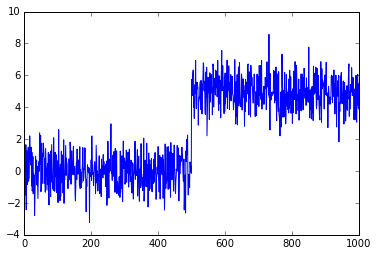

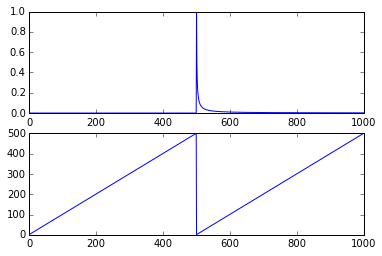

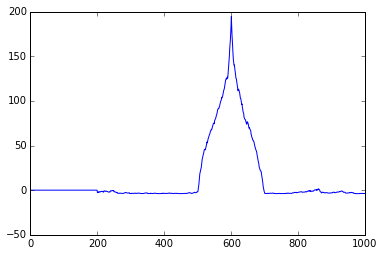

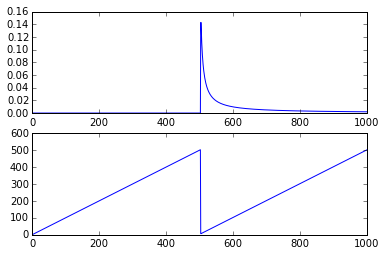

1.0
0.996272450249
0.979580223881


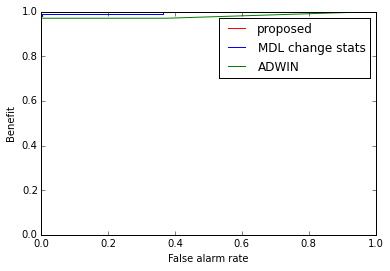

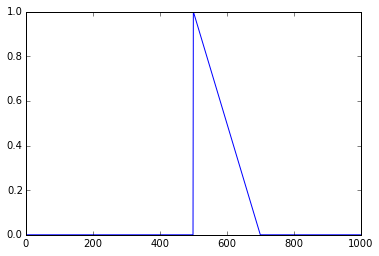

In [22]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000])) * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [8]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import evaluation as ev
from sklearn.metrics import auc
import adwin

aucs_mono_mu5 = np.zeros((3, 50))
for k in range(0, 50):
    # generate data
    rng = np.random
    data = rng.normal(size=1000)
    for i in range(500,1000):
        data[i] = data[i] + 5
    t_true = [500]
    T = 200
    
    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 1.5)
    score = ev.InvRunLen(size[0])
    
    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1000) * (min(score2[200:1000]))
    score2_[200:1000] = score2[200:1000]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_mono_mu5[0, k] = auc(x,y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mono_mu5[1, k] = auc(x2,y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e = ev.B(score3, beta, t_true, T)
        f  = ev.N(score3, beta, t_true, T)
        g = ev.supB(score3, t_true, T)
        h = ev.supN(score3, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_mono_mu5[2, k] = auc(x3,y3)

Populating the interactive namespace from numpy and matplotlib


In [13]:
print("[proposed,   MDL_h=200,   ADWIN]")
print("auc_mean: ", np.mean(aucs_mono_mu5, 1))
print ("auc_std: ",np.std(aucs_mono_mu5, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.99151056  0.99176759  0.97460902]
auc_std:  [ 0.02027189  0.00566575  0.00695165]


単変化(分散), $\Delta = 2$

Populating the interactive namespace from numpy and matplotlib


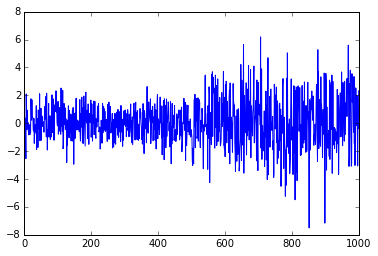

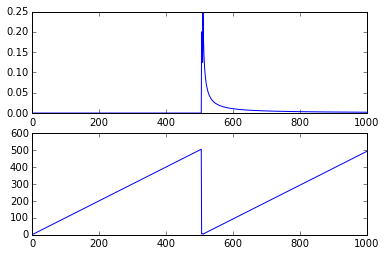

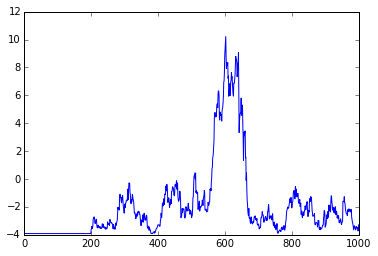

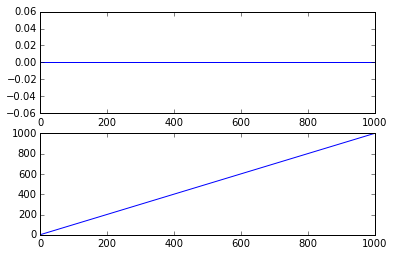

0.959468283582
0.914444465174
0.5


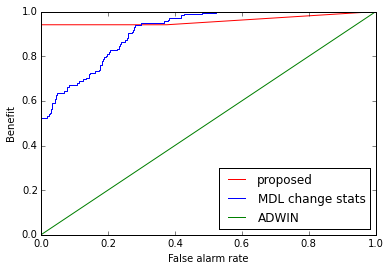

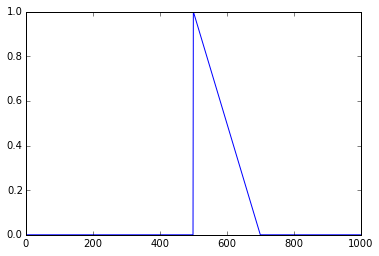

In [33]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 2
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]) ) 
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [17]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import evaluation as ev
from sklearn.metrics import auc
import adwin

aucs_mono_sig2 = np.zeros((3, 50))
for k in range(0, 50):
    # generate data
    rng = np.random
    data = rng.normal(size=1000)
    for i in range(500,1000):
        data[i] = data[i] * 2
    t_true = [500]
    T = 200
    
    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 1.5)
    score = ev.InvRunLen(size[0])
    
    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1000) * (min(score2[200:1000]))
    score2_[200:1000] = score2[200:1000]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_mono_sig2[0, k] = auc(x,y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mono_sig2[1, k] = auc(x2,y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e = ev.B(score3, beta, t_true, T)
        f  = ev.N(score3, beta, t_true, T)
        g = ev.supB(score3, t_true, T)
        h = ev.supN(score3, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_mono_sig2[2, k] = auc(x3,y3)

Populating the interactive namespace from numpy and matplotlib


In [19]:
print("[proposed,   MDL_h=200,   ADWIN]")
print("auc_mean: ", np.mean(aucs_mono_sig2, 1))
print ("auc_std: ",np.std(aucs_mono_sig2, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.89759007  0.93403408  0.5       ]
auc_std:  [ 0.07377033  0.03988966  0.        ]


単変化(分散), $\Delta = 5$

Populating the interactive namespace from numpy and matplotlib


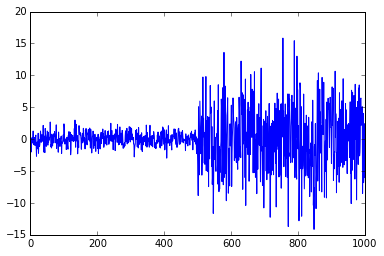

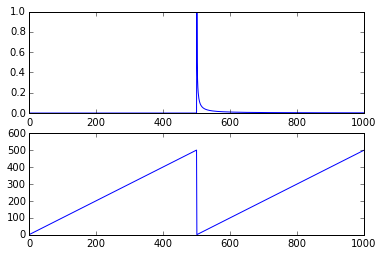

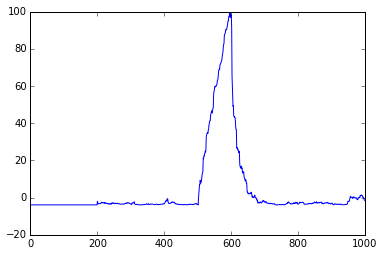

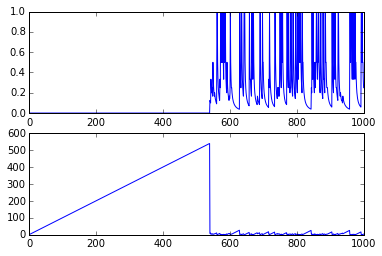

0.99315920398
0.984460634328
0.631567630597


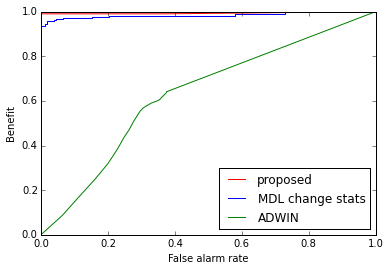

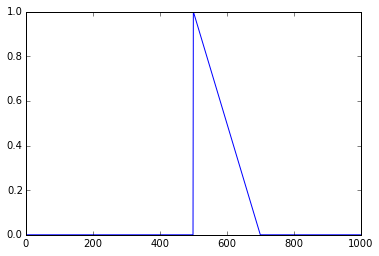

In [5]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 5
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000])) 
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [10]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import evaluation as ev
from sklearn.metrics import auc
import adwin

aucs_mono_sig5 = np.zeros((3, 50))
for k in range(0, 50):
    # generate data
    rng = np.random
    data = rng.normal(size=1000)
    for i in range(500,1000):
        data[i] = data[i] * 5
    t_true = [500]
    T = 200
    
    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 1.5)
    score = ev.InvRunLen(size[0])
    
    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1000) * (min(score2[200:1000]))
    score2_[200:1000] = score2[200:1000]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_mono_sig5[0, k] = auc(x,y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mono_sig5[1, k] = auc(x2,y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e = ev.B(score3, beta, t_true, T)
        f  = ev.N(score3, beta, t_true, T)
        g = ev.supB(score3, t_true, T)
        h = ev.supN(score3, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_mono_sig5[2, k] = auc(x3,y3)

Populating the interactive namespace from numpy and matplotlib


In [15]:
print("[proposed,   MDL_h=200,   ADWIN]")
print("auc_mean: ", np.mean(aucs_mono_sig5, 1))
print ("auc_std: ",np.std(aucs_mono_sig5, 1))

[proposed,   MDL_h=200,   ADWIN]
auc_mean:  [ 0.9783531   0.97412602  0.76191804]
auc_std:  [ 0.03195288  0.01552236  0.05214168]


多重変化(平均、abrupt)

Populating the interactive namespace from numpy and matplotlib


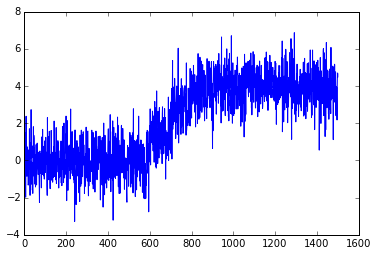

In [17]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

# generate data
#rng = np.random.RandomState(123)
data = np.random.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] + mu[i-500]
t_true = [600, 700, 800, 900]
#t_true = [100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.figure(1)
plt.plot(data)

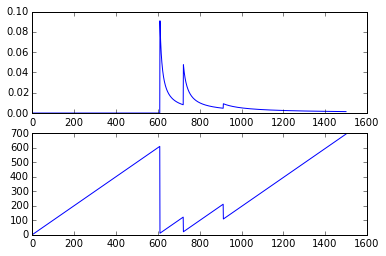

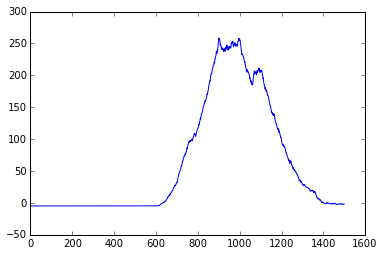

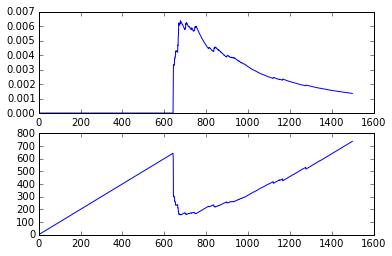

0.965101980198
0.813951125113
0.87676329883


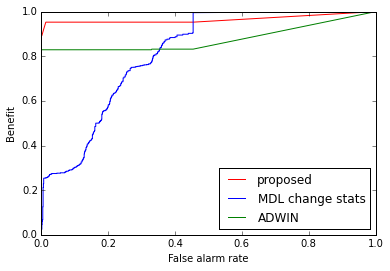

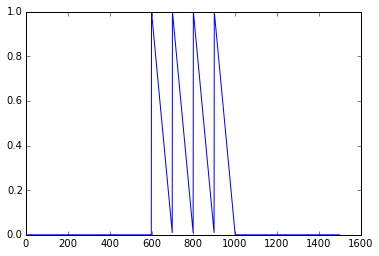

In [6]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2.0)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib


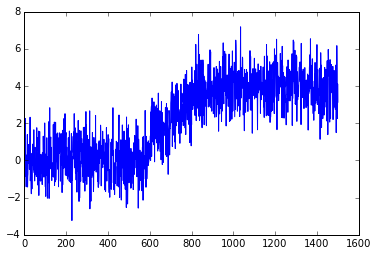

In [51]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

# generate data
#rng = np.random.RandomState(123)
data = np.random.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] + mu[i-500]
t_true = [600, 700, 800, 900]
#t_true = [100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.figure(1)
plt.plot(data)

Populating the interactive namespace from numpy and matplotlib


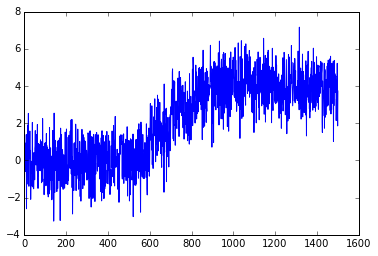

In [54]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

# generate data
#rng = np.random.RandomState(123)
data = np.random.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] + mu[i-500]
t_true = [600, 700, 800, 900]
#t_true = [100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.figure(1)
plt.plot(data)

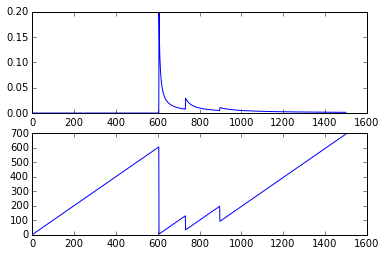

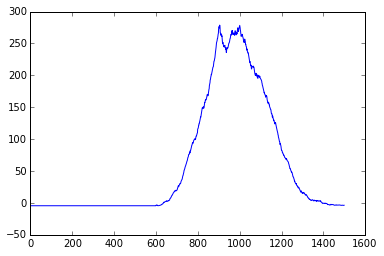

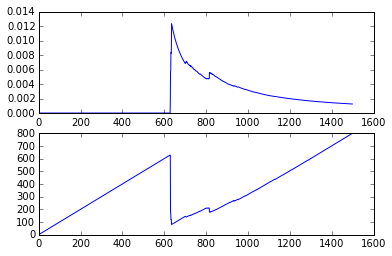

0.978937511251
0.812104320432
0.909170139514


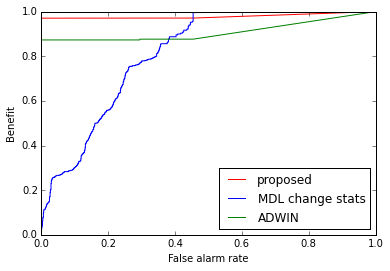

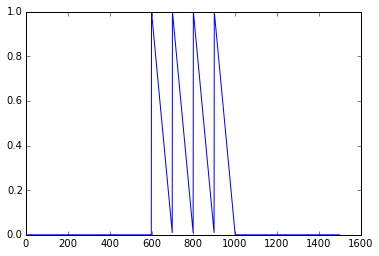

In [39]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

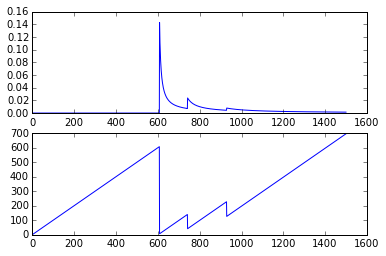

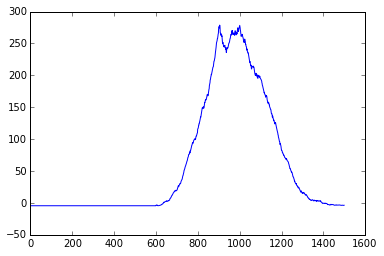

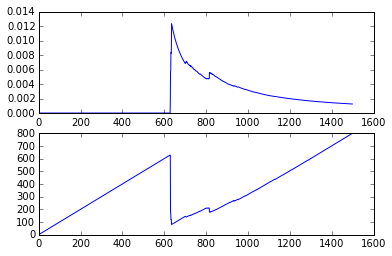

0.970444486949
0.812104320432
0.909170139514


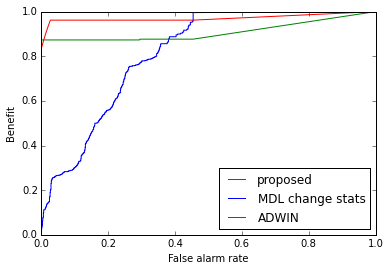

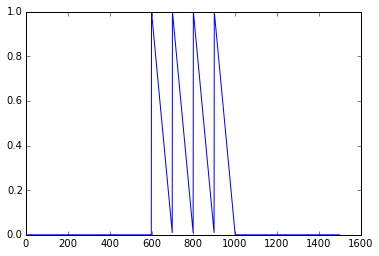

In [41]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

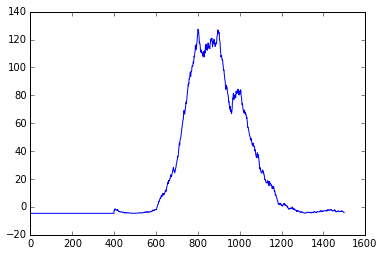

0.965101980198
0.950896849685
0.87676329883


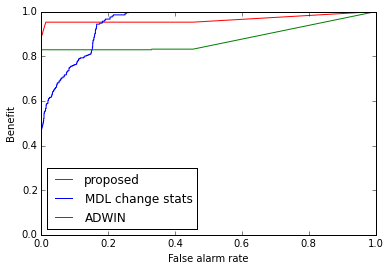

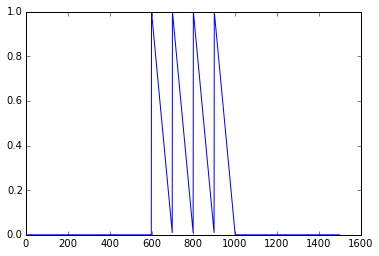

In [10]:
plt.figure(3)
h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

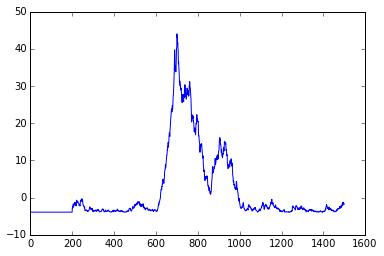

0.965101980198
0.971574122412
0.87676329883


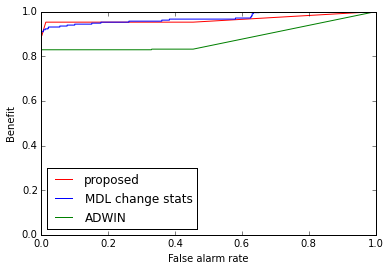

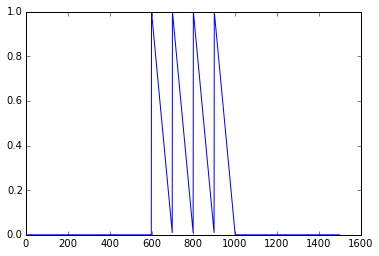

In [11]:
plt.figure(3)
h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

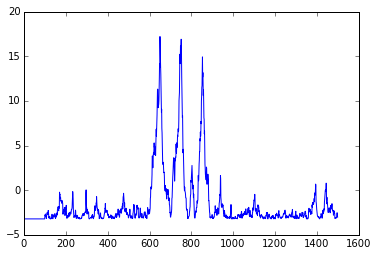

0.965101980198
0.85794770477
0.87676329883


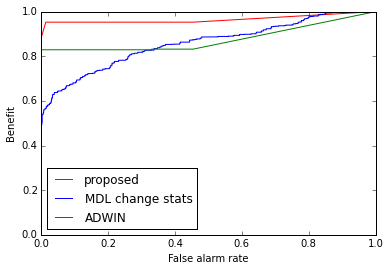

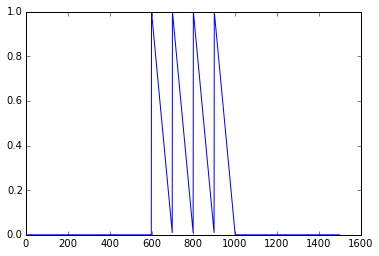

In [12]:
plt.figure(3)
h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [19]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time

start = time.time()

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

aucs_mu_ab = np.zeros((6, 50))
for k in range(0, 50):
    # generate data
    data = np.random.normal(size=1500)
    for i in range(500, 1500):
        data[i] = data[i] + mu[i-500]
    t_true = [600, 700, 800, 900]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2.0)
    score = ev.InvRunLen(size[0])


    

elapsed_time = time.time() - start
print("elapsed_time : {0}".format(elapsed_time) + "{sec}")

Populating the interactive namespace from numpy and matplotlib
elapsed_time : 9902.852642059326{sec}


In [29]:
print("[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]")
print("auc_mean: ", np.mean(aucs_mu_ab, 1))
print ("auc_std: ",np.std(aucs_mu_ab, 1))

[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]
auc_mean:  [ 0.95486272  0.81326164  0.92799356  0.97403526  0.80335685  0.87468276]
auc_std:  [ 0.0149383   0.01199146  0.01559199  0.01522105  0.04305863  0.01927531]


多重変化(分散、abrupt)

Populating the interactive namespace from numpy and matplotlib


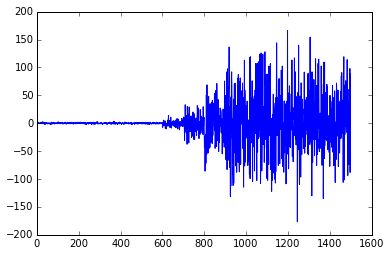

In [44]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s
log_sigma = np.zeros(1000)
for i in range(0, 1000):
    log_sigma[i] =  0.2 * I(i)

# generate data
rng = np.random
data = rng.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] * np.exp(log_sigma[i-500])
t_true = [600, 700, 800, 900]
#t_true = [100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.figure(1)
plt.plot(data)

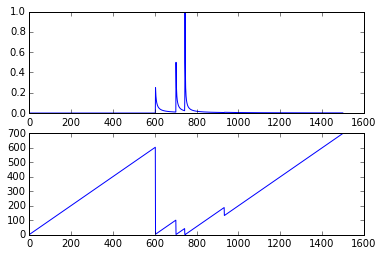

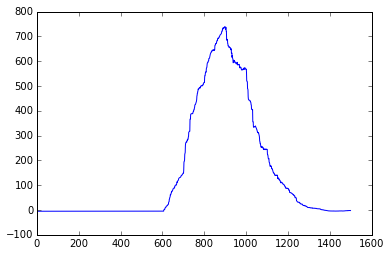

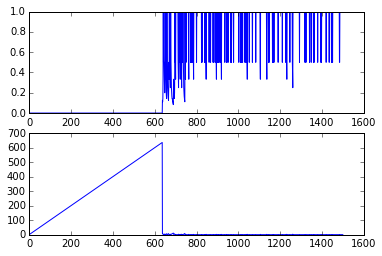

0.985814581458
0.922389378938
0.659112308731


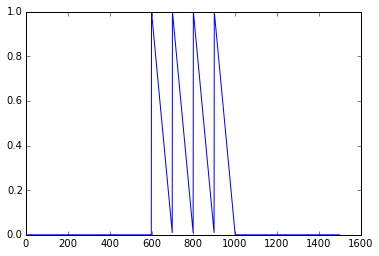

In [2]:
plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2.0)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

0.985814581458
0.981086093609
0.659112308731


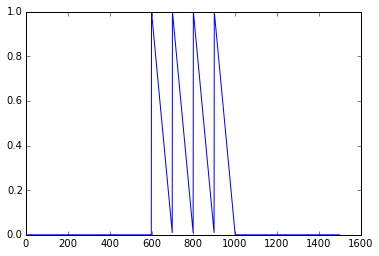

In [4]:
plt.figure(3)
h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

0.985814581458
0.984063186319
0.659112308731


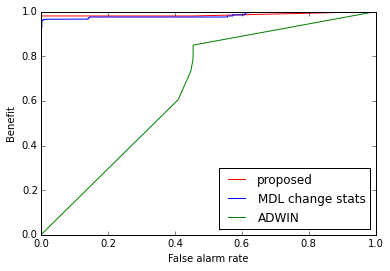

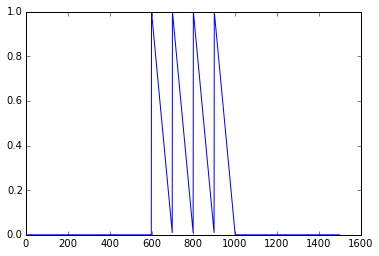

In [5]:
plt.figure(3)
h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

0.985814581458
0.911669621962
0.659112308731


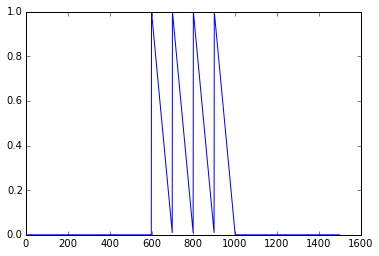

In [6]:
plt.figure(3)
h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]
plt.plot(score2_)
plt.show()

plt.figure(5)
T = 100
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(6)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [30]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time

start = time.time()

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * H(x - 100 * i)
    return s

log_sigma = np.zeros(1000)
for i in range(0, 1000):
    log_sigma[i] =  0.2 * I(i)

aucs_sig_ab = np.zeros((6, 50))
for k in range(0, 50):
    # generate data
    data = np.random.normal(size=1500)
    for i in range(500, 1500):
        data[i] = data[i] * np.exp(log_sigma[i-500])
    t_true = [600, 700, 800, 900]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2.0)
    score = ev.InvRunLen(size[0])

    h = 300
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
    score2_[2 * h :1500] = score2[2 * h :1500]

    h = 200
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score3 = stat.transform(X=data)
    score3_ = np.ones(1500) * (min(score3[2 * h :1500]))
    score3_[2 * h :1500] = score3[2 * h :1500]

    h = 100
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score4 = stat.transform(X=data)
    score4_ = np.ones(1500) * (min(score4[2 * h :1500]))
    score4_[2 * h :1500] = score4[2 * h :1500]

    h = 50
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score5 = stat.transform(X=data)
    score5_ = np.ones(1500) * (min(score5[2 * h :1500]))
    score5_[2 * h :1500] = score5[2 * h :1500]

    ins6 = adwin.ADWIN(a=1)
    size6 = ins6.transform(X=data, delta = 0.5)
    score6 = ev.InvRunLen(size6[0])


    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    T = 100
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_sig_ab[0, k] = auc(x, y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_ab[1, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score3_) - 1] + sorted(score3_)
    for beta in p:
        e2 = ev.B(score3_, beta, t_true, T)
        f2  = ev.N(score3_, beta, t_true, T)
        g2 = ev.supB(score3_, t_true, T)
        h2 = ev.supN(score3_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_ab[2, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score4_) - 1] + sorted(score4_)
    for beta in p:
        e2 = ev.B(score4_, beta, t_true, T)
        f2  = ev.N(score4_, beta, t_true, T)
        g2 = ev.supB(score4_, t_true, T)
        h2 = ev.supN(score4_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_ab[3, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score5_) - 1] + sorted(score5_)
    for beta in p:
        e2 = ev.B(score5_, beta, t_true, T)
        f2  = ev.N(score5_, beta, t_true, T)
        g2 = ev.supB(score5_, t_true, T)
        h2 = ev.supN(score5_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_ab[4, k] = auc(x2, y2)

    x3 = []
    y3 = []
    p = [min(score6) - 1] + sorted(score6)
    for beta in p:
        e = ev.B(score6, beta, t_true, T)
        f  = ev.N(score6, beta, t_true, T)
        g = ev.supB(score6, t_true, T)
        h = ev.supN(score6, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_sig_ab[5, k] = auc(x3, y3)

elapsed_time = time.time() - start
print("elapsed_time : {0}".format(elapsed_time) + "{sec}")

Populating the interactive namespace from numpy and matplotlib
elapsed_time : 9149.484626054764{sec}


In [31]:
print("[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]")
print("auc_mean: ", np.mean(aucs_sig_ab, 1))
print ("auc_std: ",np.std(aucs_sig_ab, 1))

[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]
auc_mean:  [ 0.98777447  0.92022681  0.9749403   0.98962877  0.87516644  0.68882185]
auc_std:  [ 0.00825883  0.00719932  0.00551712  0.00695875  0.03683407  0.02155981]


多重変化(平均, grad)

In [58]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 20:
        return x / 20
    else:
        return 1
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * S(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

# generate data
data = np.random.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] + mu[i-500]
t_true = [600, 700, 800, 900]
plt.plot(data)

Populating the interactive namespace from numpy and matplotlib


In [12]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time


#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 3.0)
score = ev.InvRunLen(size[0])

h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]

h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score3 = stat.transform(X=data)
score3_ = np.ones(1500) * (min(score3[2 * h :1500]))
score3_[2 * h :1500] = score3[2 * h :1500]

h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score4 = stat.transform(X=data)
score4_ = np.ones(1500) * (min(score4[2 * h :1500]))
score4_[2 * h :1500] = score4[2 * h :1500]

h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score5 = stat.transform(X=data)
score5_ = np.ones(1500) * (min(score5[2 * h :1500]))
score5_[2 * h :1500] = score5[2 * h :1500]

ins6 = adwin.ADWIN(a=1)
size6 = ins6.transform(X=data, delta = 0.5)
score6 = ev.InvRunLen(size6[0])


# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x, y))

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score3_) - 1] + sorted(score3_)
for beta in p:
    e2 = ev.B(score3_, beta, t_true, T)
    f2  = ev.N(score3_, beta, t_true, T)
    g2 = ev.supB(score3_, t_true, T)
    h2 = ev.supN(score3_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score4_) - 1] + sorted(score4_)
for beta in p:
    e2 = ev.B(score4_, beta, t_true, T)
    f2  = ev.N(score4_, beta, t_true, T)
    g2 = ev.supB(score4_, t_true, T)
    h2 = ev.supN(score4_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score5_) - 1] + sorted(score5_)
for beta in p:
    e2 = ev.B(score5_, beta, t_true, T)
    f2  = ev.N(score5_, beta, t_true, T)
    g2 = ev.supB(score5_, t_true, T)
    h2 = ev.supN(score5_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x3 = []
y3 = []
p = [min(score6) - 1] + sorted(score6)
for beta in p:
    e = ev.B(score6, beta, t_true, T)
    f  = ev.N(score6, beta, t_true, T)
    g = ev.supB(score6, t_true, T)
    h = ev.supN(score6, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3, y3))


Populating the interactive namespace from numpy and matplotlib
0.912765616562
0.786412331233
0.926370432043
0.950754770477
0.785568541854
0.83972450495


In [13]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time

start = time.time()

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 20:
        return x / 20
    else:
        return 1
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * S(x - 100 * i)
    return s

mu = np.zeros(1000)
for i in range(0, 1000):
    mu[i] =  0.2 * I(i)

aucs_mu_grad = np.zeros((6, 50))
for k in range(0, 50):
    # generate data
    data = np.random.normal(size=1500)
    for i in range(500, 1500):
        data[i] = data[i] + mu[i-500]
    t_true = [600, 700, 800, 900]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2.0)
    score = ev.InvRunLen(size[0])

    h = 300
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
    score2_[2 * h :1500] = score2[2 * h :1500]

    h = 200
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score3 = stat.transform(X=data)
    score3_ = np.ones(1500) * (min(score3[2 * h :1500]))
    score3_[2 * h :1500] = score3[2 * h :1500]

    h = 100
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score4 = stat.transform(X=data)
    score4_ = np.ones(1500) * (min(score4[2 * h :1500]))
    score4_[2 * h :1500] = score4[2 * h :1500]

    h = 50
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score5 = stat.transform(X=data)
    score5_ = np.ones(1500) * (min(score5[2 * h :1500]))
    score5_[2 * h :1500] = score5[2 * h :1500]

    ins6 = adwin.ADWIN(a=1)
    size6 = ins6.transform(X=data, delta = 0.5)
    score6 = ev.InvRunLen(size6[0])


    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    T = 100
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_mu_grad[0, k] = auc(x, y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mu_grad[1, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score3_) - 1] + sorted(score3_)
    for beta in p:
        e2 = ev.B(score3_, beta, t_true, T)
        f2  = ev.N(score3_, beta, t_true, T)
        g2 = ev.supB(score3_, t_true, T)
        h2 = ev.supN(score3_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mu_grad[2, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score4_) - 1] + sorted(score4_)
    for beta in p:
        e2 = ev.B(score4_, beta, t_true, T)
        f2  = ev.N(score4_, beta, t_true, T)
        g2 = ev.supB(score4_, t_true, T)
        h2 = ev.supN(score4_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mu_grad[3, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score5_) - 1] + sorted(score5_)
    for beta in p:
        e2 = ev.B(score5_, beta, t_true, T)
        f2  = ev.N(score5_, beta, t_true, T)
        g2 = ev.supB(score5_, t_true, T)
        h2 = ev.supN(score5_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_mu_grad[4, k] = auc(x2, y2)

    x3 = []
    y3 = []
    p = [min(score6) - 1] + sorted(score6)
    for beta in p:
     j   e = ev.B(score6, beta, t_true, T)
        f  = ev.N(score6, beta, t_true, T)
        g = ev.supB(score6, t_true, T)
        h = ev.supN(score6, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_mu_grad[5, k] = auc(x3, y3)

elapsed_time = time.time() - start
print("elapsed_time : {0}".format(elapsed_time) + "{sec}")

Populating the interactive namespace from numpy and matplotlib
elapsed_time : 10640.333121061325{sec}


In [15]:
print("[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]")
print("auc_mean: ", np.mean(aucs_mu_grad, 1))
print ("auc_std: ",np.std(aucs_mu_grad, 1))

[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]
auc_mean:  [ 0.91480036  0.79461505  0.90564576  0.95566699  0.76028134  0.84794209]
auc_std:  [ 0.01114074  0.0129996   0.01700511  0.02261306  0.05385985  0.0122227 ]


多重変化(分散, grad)

In [66]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 20:
        return x / 20
    else:
        return 1
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * S(x - 100 * i)
    return s

log_sigma = np.zeros(1000)
for i in range(0, 1000):
    log_sigma[i] =  0.2 * I(i)

# generate data
data = np.random.normal(size=1500)
for i in range(500, 1500):
    data[i] = data[i] * np.exp(log_sigma[i-500])
t_true = [600, 700, 800, 900]
plt.plot(data)

Populating the interactive namespace from numpy and matplotlib


In [19]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time


#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 3.0)
score = ev.InvRunLen(size[0])

h = 300
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
score2_[2 * h :1500] = score2[2 * h :1500]

h = 200
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score3 = stat.transform(X=data)
score3_ = np.ones(1500) * (min(score3[2 * h :1500]))
score3_[2 * h :1500] = score3[2 * h :1500]

h = 100
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score4 = stat.transform(X=data)
score4_ = np.ones(1500) * (min(score4[2 * h :1500]))
score4_[2 * h :1500] = score4[2 * h :1500]

h = 50
stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
score5 = stat.transform(X=data)
score5_ = np.ones(1500) * (min(score5[2 * h :1500]))
score5_[2 * h :1500] = score5[2 * h :1500]

ins6 = adwin.ADWIN(a=1)
size6 = ins6.transform(X=data, delta = 0.5)
score6 = ev.InvRunLen(size6[0])


# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
T = 100
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x, y))

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score3_) - 1] + sorted(score3_)
for beta in p:
    e2 = ev.B(score3_, beta, t_true, T)
    f2  = ev.N(score3_, beta, t_true, T)
    g2 = ev.supB(score3_, t_true, T)
    h2 = ev.supN(score3_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score4_) - 1] + sorted(score4_)
for beta in p:
    e2 = ev.B(score4_, beta, t_true, T)
    f2  = ev.N(score4_, beta, t_true, T)
    g2 = ev.supB(score4_, t_true, T)
    h2 = ev.supN(score4_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x2 = []
y2 = []
p = [min(score5_) - 1] + sorted(score5_)
for beta in p:
    e2 = ev.B(score5_, beta, t_true, T)
    f2  = ev.N(score5_, beta, t_true, T)
    g2 = ev.supB(score5_, t_true, T)
    h2 = ev.supN(score5_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2, y2))

x3 = []
y3 = []
p = [min(score6) - 1] + sorted(score6)
for beta in p:
    e = ev.B(score6, beta, t_true, T)
    f  = ev.N(score6, beta, t_true, T)
    g = ev.supB(score6, t_true, T)
    h = ev.supN(score6, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3, y3))


Populating the interactive namespace from numpy and matplotlib
0.93195319532
0.887290819082
0.946693429343
0.960407245725
0.855095229523
0.662548582358


In [20]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as pltk
import evaluation as ev
from sklearn.metrics import auc
import adwin
import time

start = time.time()

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 20:
        return x / 20
    else:
        return 1
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (10- 2 * i) * S(x - 100 * i)
    return s

log_sigma = np.zeros(1000)
for i in range(0, 1000):
    log_sigma[i] =  0.2 * I(i)

aucs_sig_grad = np.zeros((6, 50))
for k in range(0, 50):
    # generate data
    data = np.random.normal(size=1500)
    for i in range(500, 1500):
        data[i] = data[i] * np.exp(log_sigma[i-500])
    t_true = [600, 700, 800, 900]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2.0)
    score = ev.InvRunLen(size[0])

    h = 300
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(1500) * (min(score2[2 * h :1500]))
    score2_[2 * h :1500] = score2[2 * h :1500]

    h = 200
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score3 = stat.transform(X=data)
    score3_ = np.ones(1500) * (min(score3[2 * h :1500]))
    score3_[2 * h :1500] = score3[2 * h :1500]

    h = 100
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score4 = stat.transform(X=data)
    score4_ = np.ones(1500) * (min(score4[2 * h :1500]))
    score4_[2 * h :1500] = score4[2 * h :1500]

    h = 50
    stat = mdl.MDLCPStat(h, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score5 = stat.transform(X=data)
    score5_ = np.ones(1500) * (min(score5[2 * h :1500]))
    score5_[2 * h :1500] = score5[2 * h :1500]

    ins6 = adwin.ADWIN(a=1)
    size6 = ins6.transform(X=data, delta = 0.5)
    score6 = ev.InvRunLen(size6[0])


    # ADWIN, proposedのscoreはinverse run length
    # benefit は 三角形
    T = 100
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs_sig_grad[0, k] = auc(x, y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_grad[1, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score3_) - 1] + sorted(score3_)
    for beta in p:
        e2 = ev.B(score3_, beta, t_true, T)
        f2  = ev.N(score3_, beta, t_true, T)
        g2 = ev.supB(score3_, t_true, T)
        h2 = ev.supN(score3_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_grad[2, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score4_) - 1] + sorted(score4_)
    for beta in p:
        e2 = ev.B(score4_, beta, t_true, T)
        f2  = ev.N(score4_, beta, t_true, T)
        g2 = ev.supB(score4_, t_true, T)
        h2 = ev.supN(score4_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_grad[3, k] = auc(x2, y2)
    
    x2 = []
    y2 = []
    p = [min(score5_) - 1] + sorted(score5_)
    for beta in p:
        e2 = ev.B(score5_, beta, t_true, T)
        f2  = ev.N(score5_, beta, t_true, T)
        g2 = ev.supB(score5_, t_true, T)
        h2 = ev.supN(score5_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs_sig_grad[4, k] = auc(x2, y2)

    x3 = []
    y3 = []
    p = [min(score6) - 1] + sorted(score6)
    for beta in p:
        e = ev.B(score6, beta, t_true, T)
        f  = ev.N(score6, beta, t_true, T)
        g = ev.supB(score6, t_true, T)
        h = ev.supN(score6, t_true, T)
        x3.append(f/h)
        y3.append(e/g)
    aucs_sig_grad[5, k] = auc(x3, y3)

elapsed_time = time.time() - start
print("elapsed_time : {0}".format(elapsed_time) + "{sec}")

Populating the interactive namespace from numpy and matplotlib
elapsed_time : 9736.925215005875{sec}


In [21]:
print("[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]")
print("auc_mean: ", np.mean(aucs_sig_grad, 1))
print ("auc_std: ",np.std(aucs_sig_grad, 1))

[proposed,   MDL_h=300,   MDL_h=200,   MDL_h=100,   MDL_h=50,   ADWIN]
auc_mean:  [ 0.94549683  0.89701279  0.95098132  0.96979431  0.82075538  0.66307816]
auc_std:  [ 0.01883389  0.00696646  0.01055165  0.01492566  0.05845552  0.01332076]


NameError: name 'plt' is not defined